Instituto Politécnico Nacional

Centro de Investigación en Computación

Minería de datos I

Ejercicios del capítulo 10. Cluster Analysis, Basic Concepts and Methods.

Ejercicios 1 al 6 y 8.

Presenta: Ana Maritza Bello

---

10.1 Describa brevemente y dé ejemplos de cada uno de los siguientes enfoques de agrupación: métodos de partición, métodos jerárquicos, métodos basados en densidad y métodos basados en cuadrículas.

| Enfoque | Descripción | Ejemplo |
| --- | --- | --- |
| **Métodos de partición** | Se basan en la construcción de un conjunto de particiones de los datos, donde cada partición representa un grupo. La mayoría de m;etodos de partición est;an basados en la distancia. El criterio general de una buena partición es que los objetos del mismo cluster son cercanos o están relacionados uno a otro, mientras que objetos en clusters diferentes están muy lejanos o son muy diferentes. | K-means, K-medoids, Fuzzy C-means |
| **Métodos jerárquicos** | Se basan en la construcción de una secuencia de particiones anidadas de los datos, donde cada partición representa un grupo. Pueden ser clasificados en aproximaciones aglomerativas (_bootom up_, une los objetos de los grupos sucesivamente hasta que todos los grupos están unidos en uno solo) o divisivas (_top-down_, comienza con todos los clusters del mismo grupo y en cada iteración divide los grupos en más pequeños, hasta que eventualmente cada objeto es un cluster). No puede corregir _merges_ o _splits_ erróneos.| Aglomerativo, Divisivo |
| **Métodos basados en densidad** | Se basan en la idea de que un grupo es un área de alta densidad de objetos rodeada por un área de baja densidad de objetos. La idea general es continuar creciendo un cluster siempre y cuando la densidad en el _vecindario_ obrepase un umbral. Por ejemplo, para cada punto dentro de un cierto cluster, el vecindario de un radio dado tiene que contener al menor un mínimo número de puntos. | DBSCAN, OPTICS |
| **Métodos basados en cuadrículas** | Estos métodos cuantifican el espacio del objeto e un número finito de celdas en forma de cuadrícula o grid. Todas las operaciones de clustering se llevan a cabo en la estructura del grid. La principal ventaja de este enfoque es un tiempo de procesamiento más rápido, que es independiente del número de datos y dependiente del número de celdas en cada dimensión del espacio cuantificado. El uso de grids es un enfoque eficiente para muchos problemas de minería de datos espaciales. | STING, CLIQUE |

10.2 Supongamos que la tarea de minería de datos es agrupar puntos (donde _(x, y)_ representa la ubicación) en tres grupos, donde los puntos son:

**A1 (2, 10), A2 (2, 5), A3 (8, 4), B1 (5, 8), B2 (7, 5), B3 (6, 4), C1 (1, 2), C2 (4, 9)**.

La función de distancia es la distancia euclidiana. Supongamos que inicialmente asignamos _A1, B1_ y _C1_ como el centro de cada grupo, respectivamente. Utilice el algoritmo _k-means_ para mostrar solo
1.  Los tres centros temáticos después de la primera ronda de ejecución.
1.  Los tres últimos grupos.

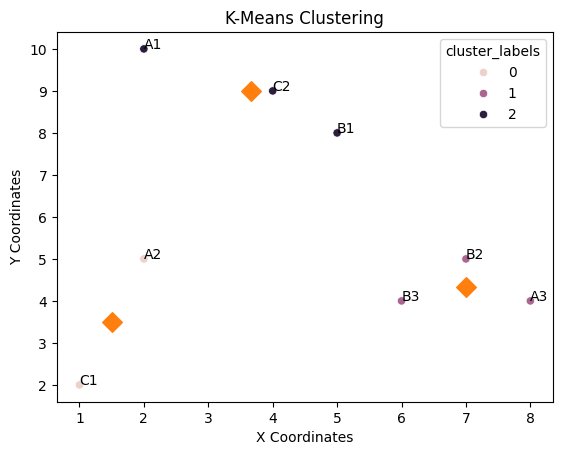

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster.vq import kmeans, vq

points = {
    'name': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2'],
    'x_coords': [2, 2, 8, 5, 7, 6, 1, 4],
    'y_coords': [10, 5, 4, 8, 5, 4, 2, 9]
}

df = pd.DataFrame(points, columns=['name', 'x_coords', 'y_coords'])

df[['x_coords', 'y_coords']] = df[['x_coords', 'y_coords']].astype(float)

# Set iter to 1 to see the initial cluster centers
cluster_centers, distortion = kmeans(df[['x_coords', 'y_coords']], 3, iter=1)
df['cluster_labels'], _ = vq(df[['x_coords', 'y_coords']], cluster_centers)

sns.scatterplot(x='x_coords', y='y_coords', hue='cluster_labels', data=df)

# Print cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='D', s=100)

for i in range(len(df)):
    plt.text(df['x_coords'][i], df['y_coords'][i], df['name'][i])

plt.title('K-Means Clustering')
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()


10.3 Utilice un ejemplo para mostrar por qué el algoritmo _k-means_ puede no encontrar el óptimo global, es decir, optimizar la variación dentro del grupo.

**Respuesta**

En k-means, la elección de los centroides iniciales puede afectar significativamente el resultado final. Si los centroides iniciales están mal seleccionados, el algoritmo puede converger a un óptimo local en lugar del óptimo global.

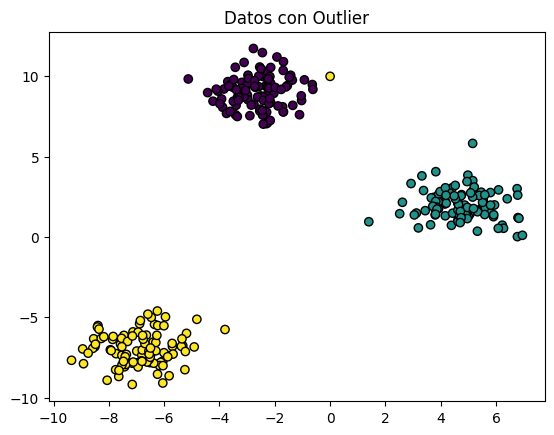

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


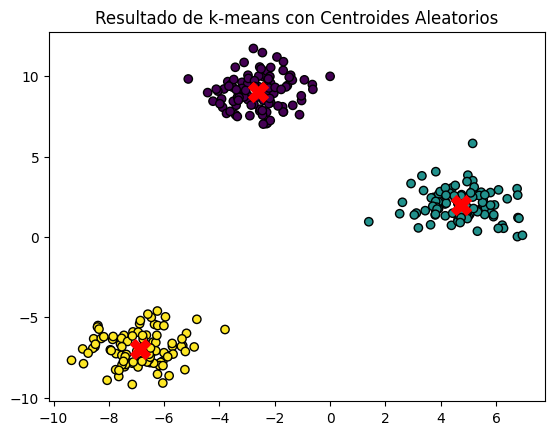

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generar datos sintéticos con tres clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Introducir un outlier en los datos
X[0] = [0, 10]

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Datos con Outlier')
plt.show()

# Aplicar k-means con 3 clusters y centroides iniciales aleatorios
kmeans = KMeans(n_clusters=3, init='random', random_state=42)
kmeans.fit(X)

# Visualizar los resultados del clustering
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red')
plt.title('Resultado de k-means con Centroides Aleatorios')
plt.show()


10.4 Para el algoritmo _k-means_, es interesante observar que al elegir
cuidadosamente los centros de agrupamiento iniciales, podemos no solo acelerar
la convergencia del algoritmo, sino también garantizar la calidad del
agrupamiento final. El algoritmo **k-means++** es una variante de _k-means_, que
elige los centros iniciales de la siguiente manera. 

1. Primero, selecciona un
centro uniformemente al azar de los objetos del conjunto de datos.

1. De forma
iterativa, para cada objeto p distinto del centro elegido, elige un objeto como
nuevo centro. Este objeto se elige al azar con probabilidad proporcional a
_dist(p)^2_, donde _dist(p)_ es la distancia desde _p_ al centro más cercano que ya
ha sido elegido. 

1. La iteración continúa hasta que se seleccionan _k_ centros.

Explique por qué este método no solo acelerará la convergencia del algoritmo _k-means_, sino que también garantizará la calidad de los resultados finales de agrupación.

**Respuesta**

Al elegir el primer centro de manera aleatoria y luego seleccionar los siguientes centros con probabilidades proporcionales a la distancia al cuadrado más cercana, se tiende a obtener una distribución más uniforme de los centroides iniciales en el espacio de características. Esto ayuda a evitar que los centroides iniciales queden atrapados en áreas donde la densidad de datos es baja.

La elección de centroides iniciales tiene un impacto significativo en el rendimiento del algoritmo k-means. El método k-means++ reduce la sensibilidad a las inicializaciones aleatorias y, en general, mejora la probabilidad de converger hacia un óptimo global, en lugar de quedar atrapado en óptimos locales.


10.5 Proporcionar el pseudocódigo del paso de reasignación de objetos del algoritmo PAM.

**Respuesta**

El algoritmo Partitioning Around Medoids (PAM) es una variante del algoritmo k-medoids que utiliza medoides en lugar de centroides. El paso de reasignación en PAM implica asignar cada objeto al medoide más cercano en función de las distancias medoidales.

```
PAM-Reassign(Data, Medoids):
    para cada objeto i en Data:
        distancia_minima = infinito
        para cada medoide j en Medoids:
            distancia_ij = calcular_distancia_medoidal(i, j)  # Función para calcular la distancia medoidal
            si distancia_ij < distancia_minima:
                asignar i al medoide j
                distancia_minima = distancia_ij

```

10.6 Tanto los algoritmos de _k-means_ como de _k-medoides_ pueden realizar una
agrupación eficaz.

(a) Ilustre la fortaleza y debilidad de _k-means_ en comparación con _k-medoides_.
(b) Ilustre las fortalezas y debilidades de estos esquemas en comparación con un esquema de agrupamiento jerárquico (por ejemplo, AGNES).

**Respuesta**

| Algoritmo | Fortalezas | Debilidades |
| --- | --- | --- |
| **k-means** | - Es más rápido que k-medoids especialmente en conjuntos grande, ya que utiliza la media para calcular los centoides, que es computacionalmente más eficiente que seleccionar medoides. <br> - Es más escalable que k-medoids. <br> - Es más eficiente que k-medoids. | - No es robusto a valores atípicos ya que utiliza la media, y los outliers pueden afectar significativamente la ubicación del centroide. <br> - No es robusto a valores faltantes. <br> - No es robusto a ruido. <br> - No es robusto a valores iniciales. <br> - No es robusto a la elección de k. |
| **k-medoids** | - Es más robusto a valores atípicos ya que utiliza medoides (puntos reales en el conjunto de datos). <br> - Es más robusto a valores faltantes. <br> - Es más robusto a ruido. <br> - Es más robusto a valores iniciales. <br> - Es más robusto a la elección de k. | - Es más lento que k-means ya que implica evaluar todas las combinaciones posibles de medoides y puntos de datos. <br> - Es menos escalable que k-means. <br> - Es menos eficiente que k-means. |
| **AGNES** | - Es más flexicle en términos de la forma de los clusters, ya que no impone forma y tamaño de los clusters. <br>- Es más robusto a valores atípicos. <br> - Es más robusto a valores faltantes. <br> - Es más robusto a ruido. <br> - Es más robusto a valores iniciales. <br> - Es más robusto a la elección de k. | - Es más lento que k-means. <br> - Es menos escalable que k-means. <br> - Es menos eficiente que k-means. |


10.8 Demuestre que en DBSCAN, para un valor fijo de _MinPts_ y dos umbrales de
vecindad, $\epsilon_1 < \epsilon_2$, un grupo _C_ con respecto a $\epsilon_1$ y
_MinPts_ debe ser un subconjunto de un grupo _C'_ con respecto a $\epsilon_2$ y _MinPts_.